In [2]:
import numpy as np

# 空间网格
N = 256
x = np.linspace(-np.pi, np.pi, N, endpoint=False)
dx = x[1] - x[0]
k = np.fft.fftfreq(N, d=dx) * 2 * np.pi
k1 = 1j * k
k2 = -k**2
k3 = -1j * k**3

In [3]:
# 初始条件
u0 = np.cos(x) + np.cos(2 * x)

# 时间推进
def solve_pde(k_operator, u0, t_end):
    u_hat = np.fft.fft(u0)
    u_hat_t = u_hat * np.exp(k_operator * t_end)
    u_t = np.fft.ifft(u_hat_t).real
    return u_t

t_plot = 0.2
u_wave = solve_pde(k1, u0, t_plot)
u_heat = solve_pde(k2, u0, t_plot)
u_airy = solve_pde(k3, u0, t_plot)

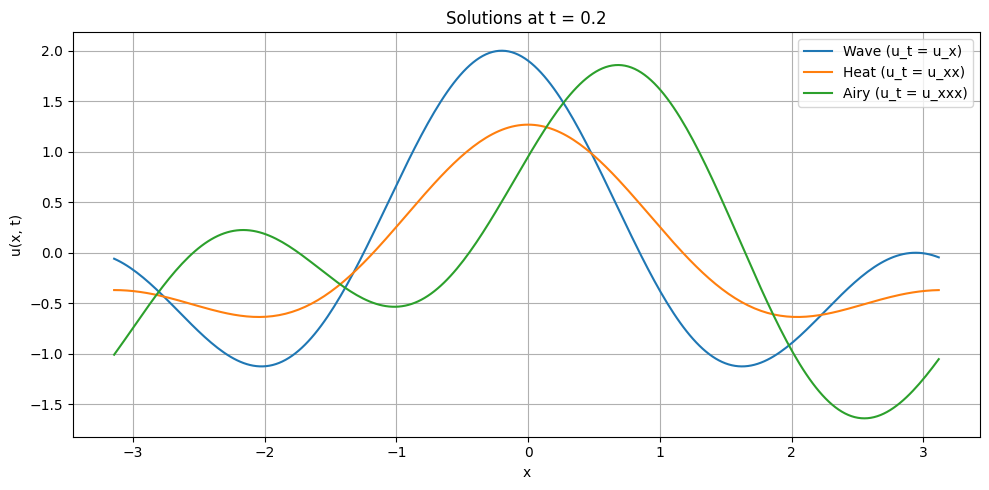

In [4]:
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(x, u_wave, label='Wave (u_t = u_x)')
plt.plot(x, u_heat, label='Heat (u_t = u_xx)')
plt.plot(x, u_airy, label='Airy (u_t = u_xxx)')
plt.title(f'Solutions at t = {t_plot}')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("../output/figures/pde_solutions.pdf")
plt.show()
